In [21]:
import numpy as np
from utils import get_lenet
from load_mnist import load_mnist
from scipy.io import loadmat
from conv_net import convnet_forward
from init_convnet import init_convnet
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [22]:
# Load the model architecture
layers = get_lenet()
params = init_convnet(layers)

# Load the network
data = loadmat('../results/lenet.mat')
params_raw = data['params']

for params_idx in range(len(params)):
    raw_w = params_raw[0,params_idx][0,0][0]
    raw_b = params_raw[0,params_idx][0,0][1]
    assert params[params_idx]['w'].shape == raw_w.shape, 'weights do not have the same shape'
    assert params[params_idx]['b'].shape == raw_b.shape, 'biases do not have the same shape'
    params[params_idx]['w'] = raw_w
    params[params_idx]['b'] = raw_b

# Load data
fullset = False
xtrain, ytrain, xvalidate, yvalidate, xtest, ytest = load_mnist(fullset)

In [23]:
# Testing the network
#### Modify the code to get the confusion matrix ####
all_preds = []
all_labels = []
for i in range(0, xtest.shape[1], 100):
    cptest, P = convnet_forward(params, layers, xtest[:,i:i+100], test=True)
    # Debugging: print the shape of P and the corresponding ytest batch
    print(f"Shape of P: {P.shape}")
    print(f"Shape of ytest batch: {ytest[i:i + 100].shape}")
    preds = np.argmax(P, axis=0)  # Assuming P contains the prediction probabilities
    all_preds.append(preds)
    all_labels.append(ytest[i:i + 100])



Shape of P: (10, 100)
Shape of ytest batch: (1, 500)
Shape of P: (10, 100)
Shape of ytest batch: (0, 500)
Shape of P: (10, 100)
Shape of ytest batch: (0, 500)
Shape of P: (10, 100)
Shape of ytest batch: (0, 500)
Shape of P: (10, 100)
Shape of ytest batch: (0, 500)


In [24]:
# Convert lists to arrays
# print(all_preds.shape)
# print(all_labels.shape)
all_preds = np.array(all_preds).flatten()
# Filter out empty arrays
all_labels = [arr for arr in all_labels if arr.size > 0]
# Now flatten the remaining arrays
all_labels = np.concatenate(all_labels).ravel()


In [25]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[47  0  0  1  0  0  1  0  1  0]
 [ 0 57  0  1  0  0  0  0  1  0]
 [ 0  0 42  0  0  0  0  2  0  0]
 [ 0  0  0 45  0  0  0  2  1  0]
 [ 0  0  1  0 36  0  0  0  0  2]
 [ 0  0  0  3  0 47  0  0  0  0]
 [ 0  0  1  0  1  1 36  0  0  0]
 [ 0  0  5  1  0  0  0 59  0  0]
 [ 0  0  0  2  0  0  0  0 47  3]
 [ 0  0  0  0  1  3  0  0  0 50]]


<Figure size 1000x700 with 0 Axes>

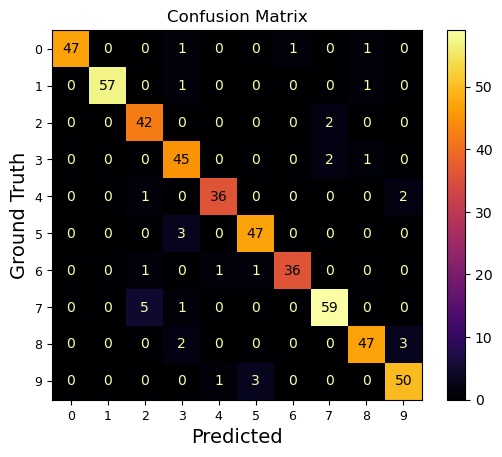

In [39]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap='inferno', colorbar=True)

plt.title('Confusion Matrix', fontsize=12)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Ground Truth', fontsize=14)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

In [27]:
# Analyze the most confused pairs of classes
# Set the diagonal to a large negative number so we ignore correct predictions
conf_matrix_no_diag = conf_matrix.copy()
np.fill_diagonal(conf_matrix_no_diag, -1)

# Find the indices of the two largest off-diagonal elements
confusion_pairs = np.unravel_index(np.argsort(conf_matrix_no_diag.ravel())[-2:], conf_matrix_no_diag.shape)

print("Most confused pairs of classes:")
for i, (class1, class2) in enumerate(zip(*confusion_pairs)):
    print(f"Pair {i+1}: Class {class1} and Class {class2} with confusion {conf_matrix[class1, class2]}")

Most confused pairs of classes:
Pair 1: Class 8 and Class 9 with confusion 3
Pair 2: Class 7 and Class 2 with confusion 5
